# $k$-means Clustering

In [1]:
import os
import sys
ex_path = os.path.abspath(os.pardir)
if ex_path not in sys.path:
    sys.path.append(ex_path)

# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import Alison's code for the demo clusters
from src.demo_images import *

# Have plots appear in notebook
#%matplotlib inline

# Default plot params
#plt.style.use('seaborn')
#cmap = 'tab10'

## Learning Goals

- Assess what scenarios could use $k$-means
- Articulate the methodology used by $k$-means
- Apply KMeans from sklearn.cluster to a relevant dataset
- Select the appropriate number of clusters using the elbow method and Silhouette Scores
- Evaluate the weaknesses and remedies to $k$-means

## A Classic Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## **Part 1**: Concept introduction
#### Import libraries and download dataset

We are continuing to use Scikit Learn as our main library.
The specific documentation for k-means can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

## Clustering!   Finding **GROUPS**

How many groups do you see?

![img](images/initialscenario.png)


## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

Because we do not have target labels, clustering is a form of machine learning called **unsupervised learning**.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

| Method 1 | Method 2 |
| -------- | -------- |
| <img src="images/from-left.gif" width=400> | <img src="images/from-right.gif" width=400> |

| Method 3 | Method 4 |
| -------- | -------- |
| <img src="images/from-top.gif" width=400> | <img src="images/from-bottom.gif" width=400> |

### Review Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

<details>
    <summary>Answers</summary>
    
    In common:
    
    - Green dots start at points
    - Calculates distance
    - Moves dots
    - Re-measures distance
    - Moves dots as needed

    Differences:
    
    - Dots start in different places and groups settle in different places

    Groups:
    
    - There are four groups
    
    Problem with this method?
    
    - Too variable!
</details>

### K-means algorithm, at its core, in an optimization function

<img src="images/minmaxdata.png" width=400>

### Reassigns groups and adjusts centroids to...

<img src="images/min.png" width=700>

### And to...

<img src="images/max.png" width=700>

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

## $k$-Means Plotter

In [2]:
from src.k_means_plotter import k_means
from sklearn.datasets import make_blobs

In [3]:
X, Y = make_blobs(centers=5, random_state=42)

In [4]:
X[:5, :]

array([[-6.2927701 , -4.68965397],
       [ 2.03530213,  5.61498563],
       [-2.97261532,  8.54855637],
       [ 0.64463087,  3.22362652],
       [-8.73867639,  6.82004726]])

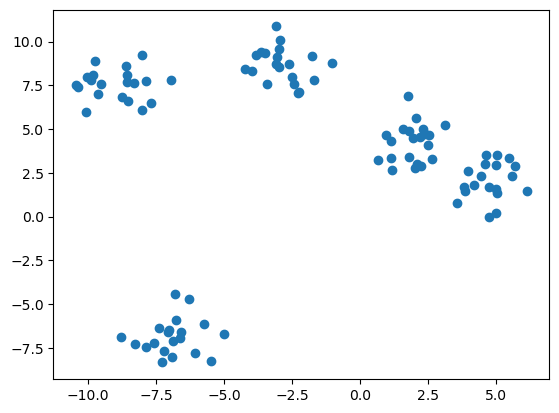

In [5]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1]);

The value of the `random_state` parameter in our `k_means()` function can make a big difference to the final clusters! We might find what are indeed the intuitive clusters in our data:

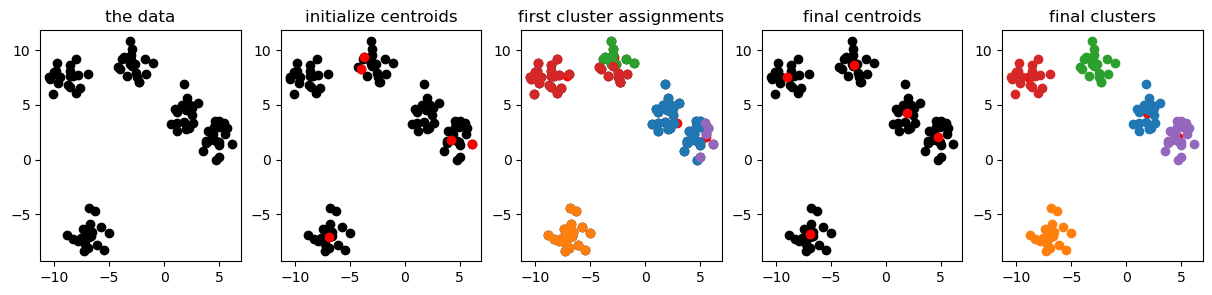

In [6]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=2)

But we also might get different results:

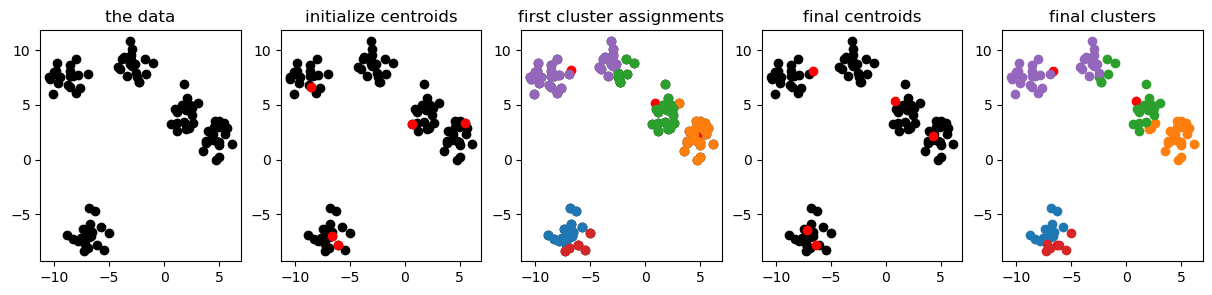

In [7]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=42)

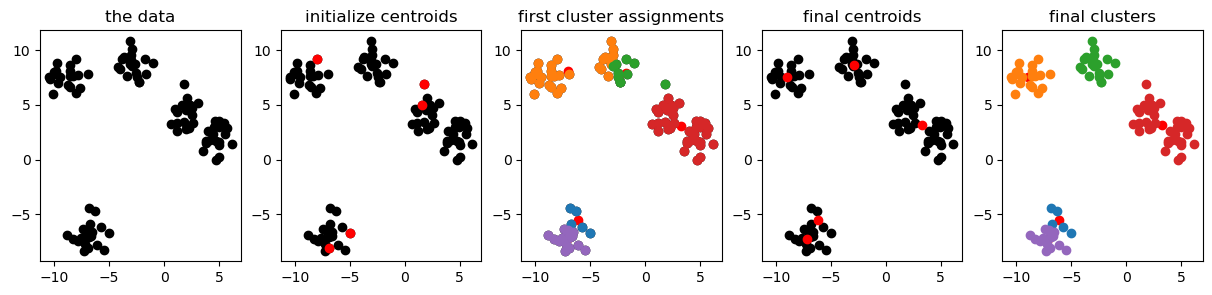

In [8]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=3)

And of course we could set $k$ to something other than 5:

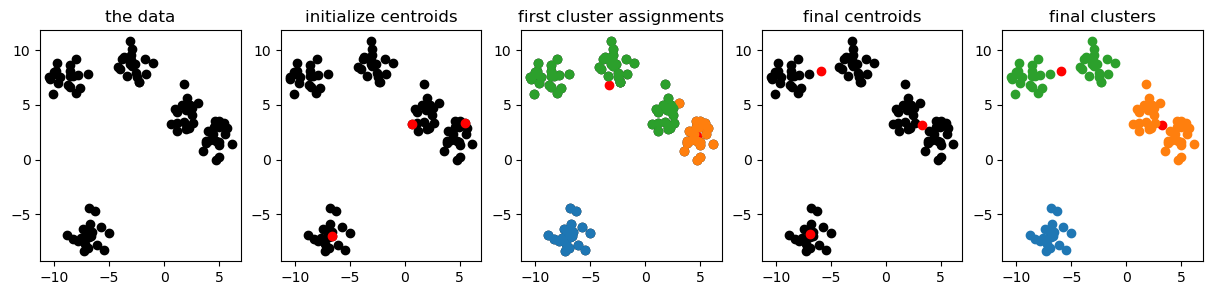

In [9]:
df = k_means(X[:, 0], X[:, 1], k=3)

#### Data for the exercise

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [10]:
dummy_dat = pd.read_csv("data/xclara.txt",
                        header=0,
                        index_col=0)
dummy_dat.reset_index(inplace=True)
dummy_dat.drop('index', axis=1, inplace=True)

In [11]:
dummy_dat.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [12]:
dummy_dat.tail()

,V1,V2
2995,85.65280,-6.461061
2996,82.77088,-2.373299
2997,64.46532,-10.501360
2998,90.72282,-12.255840
2999,64.87976,-24.877310


#### EDA of variables

In [13]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


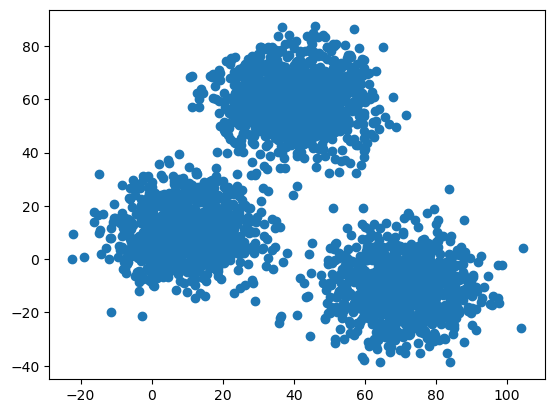

In [14]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2']);

#### Introduction of `Kmeans`

In [15]:
model = KMeans(n_clusters=3).fit(dummy_dat)

Notice the `init` and `n_init` parameters!

In [16]:
model.cluster_centers_

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

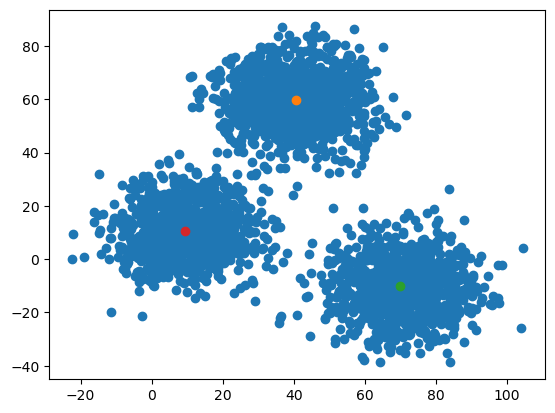

In [17]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'])
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0],
                model.cluster_centers_[i][1]);

In [18]:
model.predict([[60, -20]])

/opt/anaconda3/envs/learn-env/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

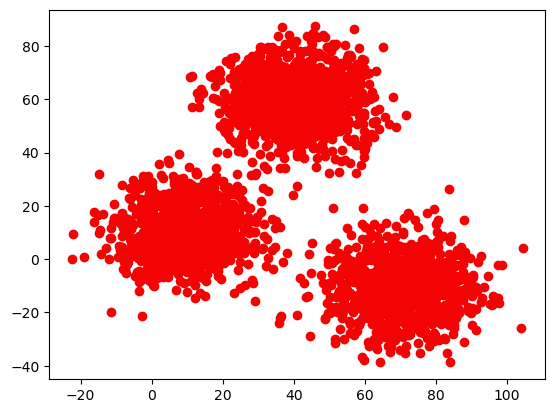

In [19]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c='#f30303');

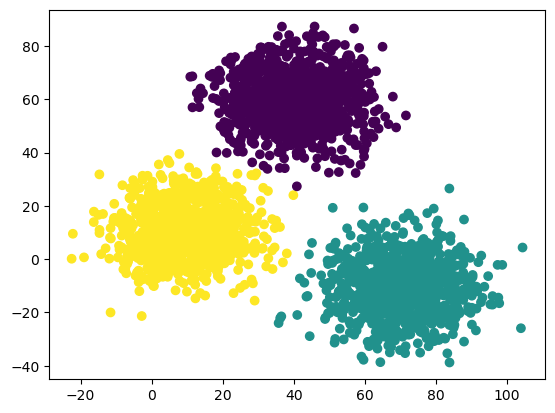

In [20]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c=model.labels_);

In [21]:
labeled_df = pd.concat([dummy_dat, pd.DataFrame(model.labels_,
                        columns=['cluster'])], axis=1)

In [22]:
labeled_df.head()

,V1,V2,cluster
0,2.072345,-3.241693,2
1,17.936710,15.784810,2
2,1.083576,7.319176,2
3,11.120670,14.406780,2
4,23.711550,2.557729,2


In [23]:
cluster0 = labeled_df[labeled_df['cluster'] == 0]
cluster1 = labeled_df[labeled_df['cluster'] == 1]
cluster2 = labeled_df[labeled_df['cluster'] == 2]

In [24]:
cluster0['V1'].head()

29     24.29990
326    37.48364
900    48.19050
901    48.32863
902    31.44145
Name: V1, dtype: float64

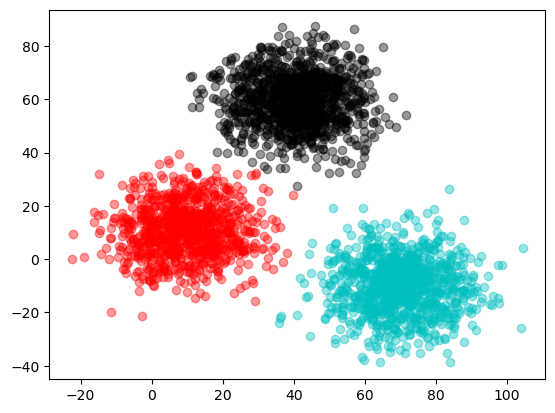

In [25]:
fig, ax = plt.subplots()
ax.scatter(cluster0['V1'], cluster0['V2'], c='k', alpha=0.4)
ax.scatter(cluster1['V1'], cluster1['V2'], c='c', alpha=0.4)
ax.scatter(cluster2['V1'], cluster2['V2'], c='r', alpha=0.4);

## Note
#### You *may* have different cluster centers.

We saw in the demo that the algorithm is sensitive to starting points.

Even if we set `n_init` to a significant value, it's still a good idea to use `random_state` to ensure repeatable results.

In [26]:
model_setseed = KMeans(n_clusters=3, random_state=10).fit(dummy_dat)
model_setseed.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

#### **Exercise**: 
- Try running `Kmeans` with different numbers of `n_clusters`, $k=2$ through $k=4$
- Check the `cluster_centers_`.

In [27]:
#Practice code goes here



<details>
    <summary>Answer here</summary>
<code>model_two_clusts = KMeans(n_clusters=2).fit(dummy_dat) # good practice to set a random state!
print(model_two_clusts.cluster_centers_)
model_four_clusts = KMeans(n_clusters=4).fit(dummy_dat)
print(model_four_clusts.cluster_centers_)</code>
    </details>

## **Part 2**: Choosing the appropriate number of $k$

#### Two metrics we can use: **elbow method** and the **silhouette coefficient**

### **Part 2A**: Elbow Method

Elbow method uses the sum of squared error calculated from each instance of $k$ to find the best value of $k$.

This is sometimes called the "inertia" of the model, and fitted sklearn $k$-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

Fewer clusters seems better, but inertia will always decrease with _more_ clusters. Hence the idea of looking for an elbow in the plot of inertia vs. $k$.

In [28]:
model.inertia_

611605.8806933891

Inertia is the sum of squared distances between points and their cluster center.

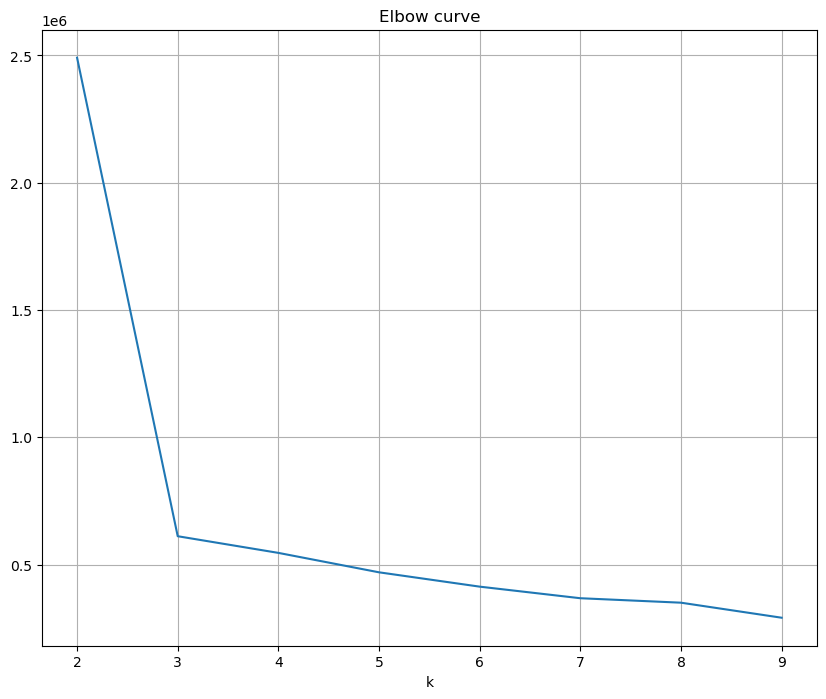

In [29]:
# Specifying the dataset and initializing variables
X = dummy_dat
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)

### **Part 2B**: Silhouette Coefficient

![silo](images/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.

> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

The Silhouette Coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.





Suppose:
- I have four points in a one-dimensional space: 0, 1, 9, and 10; and
- I put them into two clusters: {0, 1} and {9, 10}.

Then we would calculate the Silhouette Score as follows:

For Point 0:
- $a=1$
- $b=9.5$
- $s(0) = \frac{9.5 - 1}{9.5} = \frac{17}{19}$

For Point 1:
- $a=1$
- $b=8.5$
- $s(1) = \frac{8.5 - 1}{8.5} = \frac{15}{17}$

For Point 9:
- $a=1$
- $b=8.5$
- $s(9) = \frac{8.5 - 1}{8.5} = \frac{15}{17}$

For Point 10:
- $a=1$
- $b=9.5$
- $s(10) = \frac{9.5 - 1}{9.5} = \frac{17}{19}$

The full Silhouette Score would be the average of all of these individual scores:

$\large s = \frac{2\left(\frac{17}{19}\right) + 2\left(\frac{15}{17}\right)}{4}$

In [30]:
(2 * 17/19 + 2 * 15/17) / 4

0.8885448916408669

In [31]:
metrics.silhouette_score(np.array([0, 1, 9, 10]).reshape(-1, 1),
                         ['red', 'red', 'blue', 'blue'])

np.float64(0.8885448916408669)

In [32]:
# Generate silhouette coefficient for each k
X = dummy_dat
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

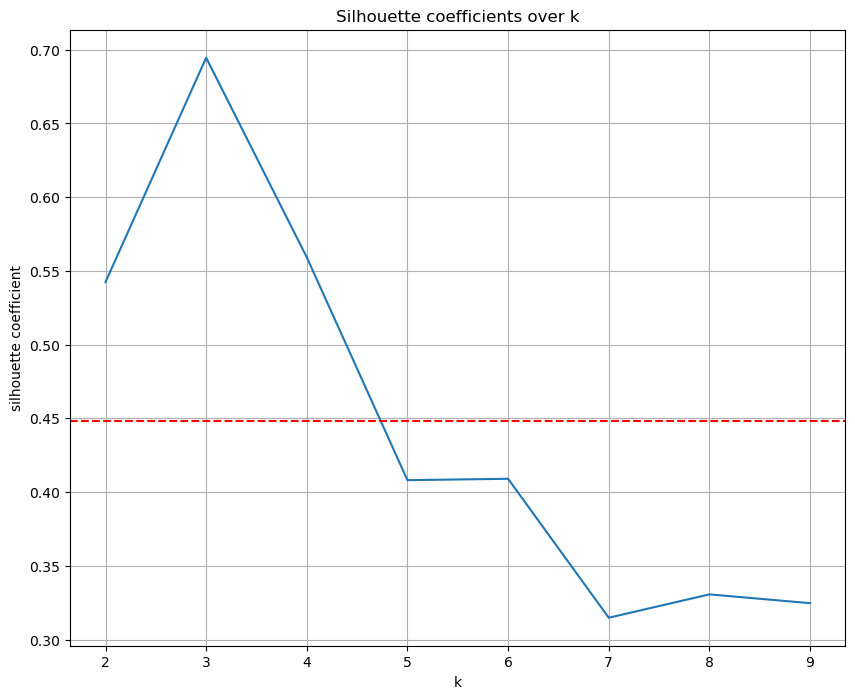

In [33]:
# Plot Silhouette coefficient
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Silhouette coefficients over k')
ax.set_xlabel('k')
ax.set_ylabel('silhouette coefficient')
ax.plot(range(2, 10), silhouette_plot)
ax.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
ax.grid(True)

## **Part 3**: **Assumptions** and **challenges** of $k$-means

- Demonstrate the ideal $k$-means dataset
- Show three scenarios where $k$-means struggles

#### Ideal $k$-means scenario

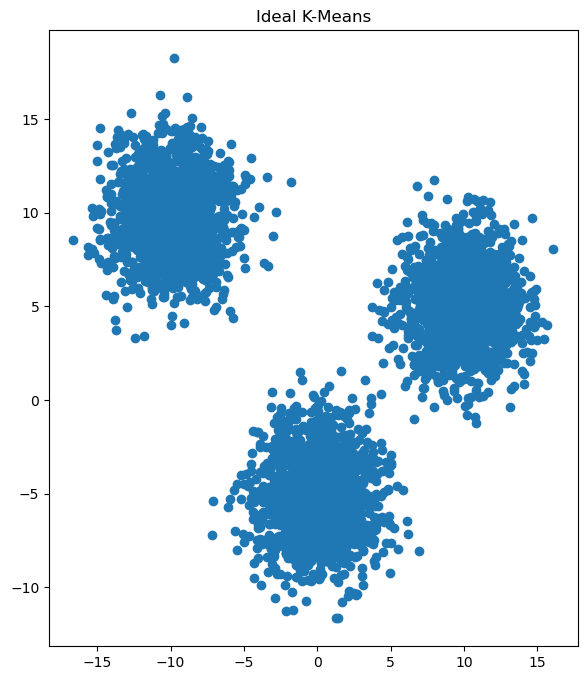

In [34]:
ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

NameError: name 'cmap' is not defined

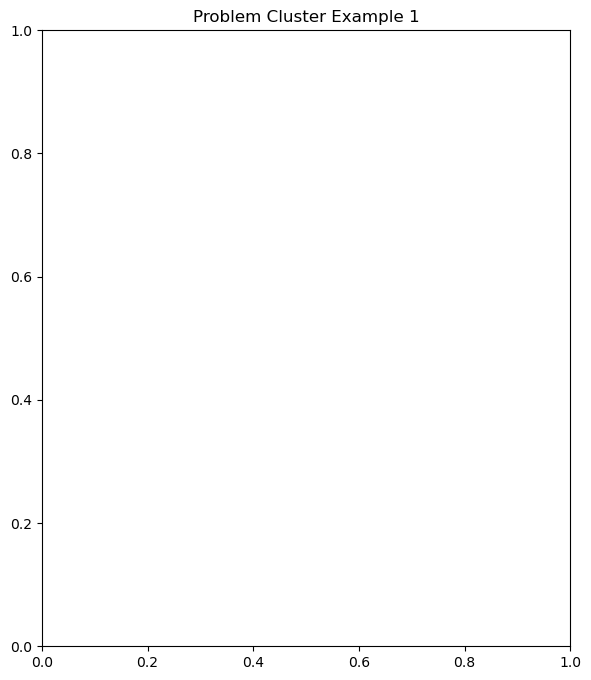

In [35]:
messyOne()

#### Problem Scenario 2 - imbalanced class size

NameError: name 'cmap' is not defined

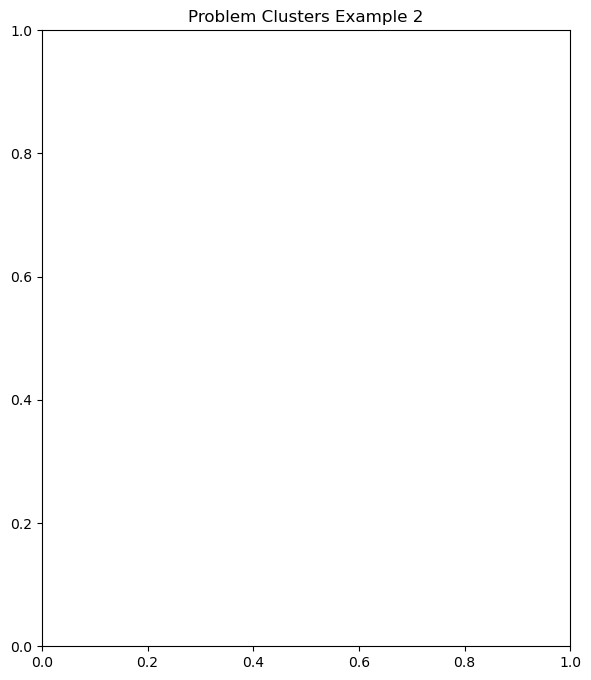

In [36]:
messyTwo()

#### Problem Scenario 3 - class size and density

NameError: name 'cmap' is not defined

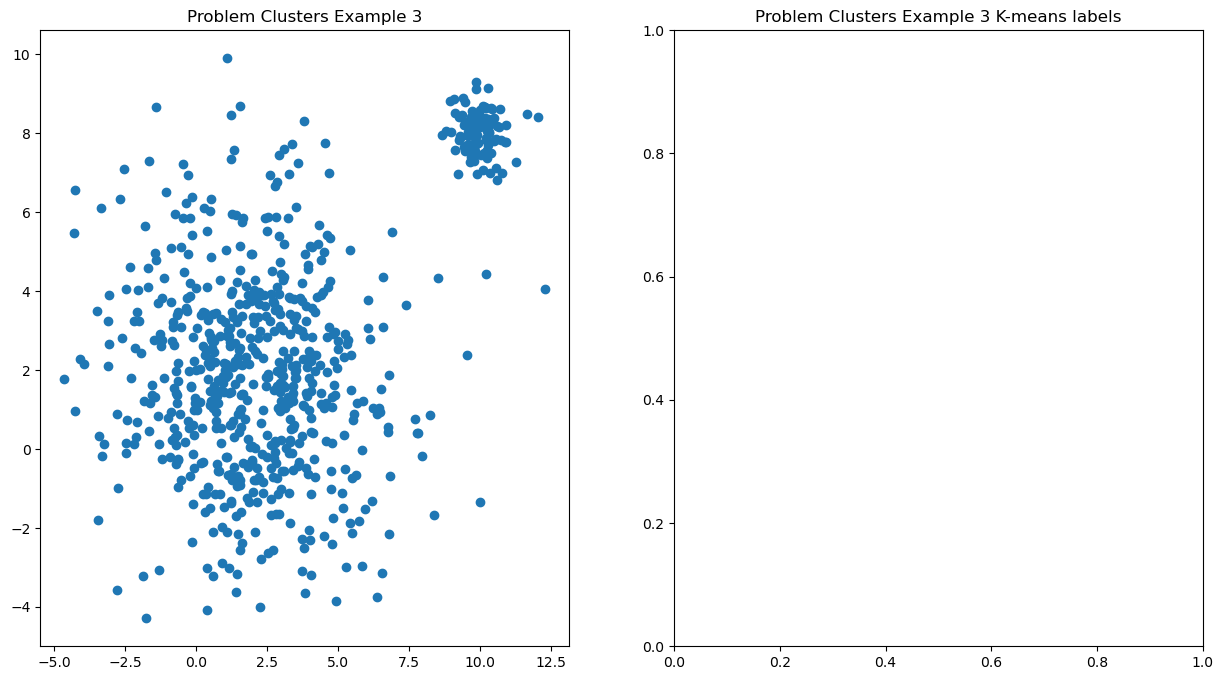

In [37]:
messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

## Exercise:
### $k$-means on larger dataset - Wine subscription

You want to run a wine subscription service, but you have no idea about wine tasting notes. You are a person of science.
You have a wine dataset of scientific measurements.
If you know a customer likes a certain wine in the dataset, can you recommend other wines to the customer in the same cluster?

#### Questions:
- How many clusters are in the wine dataset?
- What are the characteristics of each clusters?
- What problems do you see potentially in the data?

the dataset is `Wine.csv`

Instructions:
- First, remove customer_segment from the dataset

In [38]:
# Work on problem here: Would scaling make a difference?
wine = pd.read_csv('data/Wine.csv')
wine.drop(columns=['Customer_Segment'], inplace=True)
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Review $k$-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of $k$
4. Plot SSE and Silhouette coefficient to find best $k$
5. Describe the characteristics of each cluster using their centroids

### How many clusters fit the data?

What can you tell me about them?

<details>
    <summary>One answer here</summary>
    <code>from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(wine)
wine_scaled = ss.transform(wine)
silhouette_scores = []
for j in range(2, 20):
    clusters = KMeans(n_clusters=j, random_state=42)
    cluster_labels = clusters.fit_predict(wine)
    silhouette = metrics.silhouette_score(wine, cluster_labels)
    silhouette_scores.append(silhouette)
print(np.argmax(silhouette_scores)) # The best number of clusters is 2.
best = KMeans(n_clusters=2, random_state=42)
wine['cluster'] = best.fit_predict(wine)
print(wine.groupby('cluster').mean())
print(best.cluster_centers_)</code>
</details>

## One last example

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 
You might have to create some new variables.

In [ ]:
shopping = pd.read_excel('data/Online Retail.xlsx')

In [ ]:
shopping.tail(20)